In [1]:
from PIL import Image
import torchvision.transforms as T

from clipdetect.detect import CLIPDetect
from clipdetect.utils import plot_detection, plot_importance_map, plot_patches, create_patches

/home/eduardo/anaconda3/envs/clip-detect/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
patch_h = 50
patch_w = 50
model_id = "openai/clip-vit-base-patch32"
window_size = 3

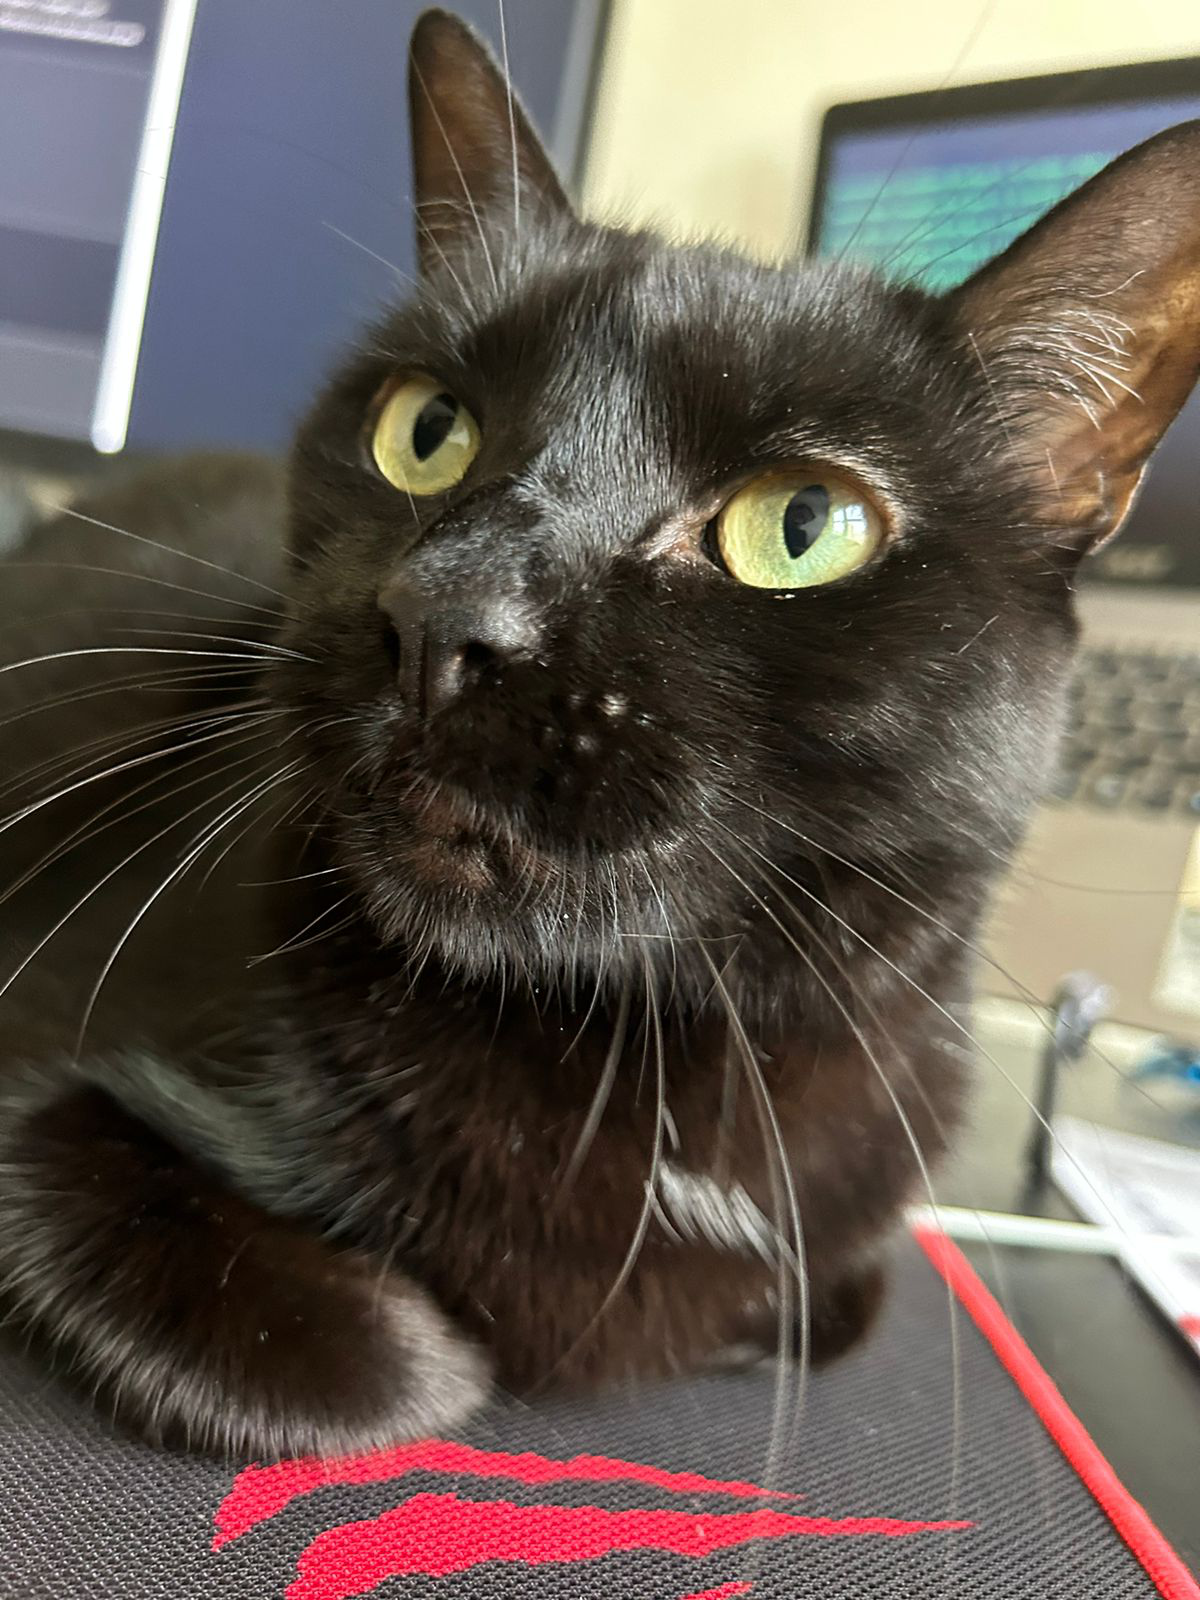

In [3]:
label = "a bird"
image_path = "assets/neca.jpeg"
image = Image.open(image_path).convert("RGB")
image

In [4]:
image_tensor = T.ToTensor()(image).unsqueeze(0)
patches = create_patches(image_tensor, patch_h, patch_w)

In [5]:
model = CLIPDetect(model_id, patch_h, patch_w, window_size)

CPU available


In [6]:
output = model([label], [image])

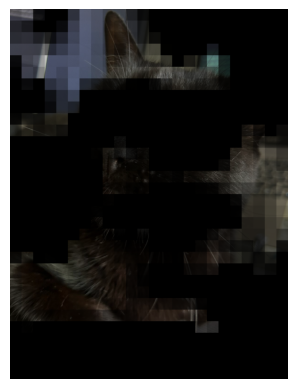

In [7]:
plot_importance_map(patches, output.importance_map)

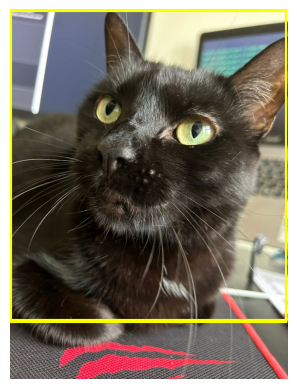

In [8]:
plot_detection(image_tensor.squeeze(0), output.bbox)

In [23]:
import torch
torch.arange(1,10, dtype=torch.float).reshape(3, 3).max()

tensor(9.)